In [2]:
from __future__ import division, print_function, absolute_import 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import BatchNormalization 
from keras.optimizers import SGD 
import keras.backend as K 
import keras.utils

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
nb_classes = 10
(X_train, y_train),(X_test, y_test)=mnist.load_data()
print("X train original shape", X_train.shape)
print("y train original shape", y_train.shape)


X train original shape (60000, 28, 28)
y train original shape (60000,)


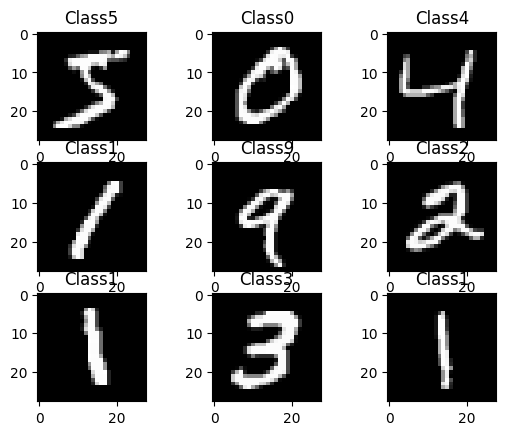

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class{}".format(y_train[i]))

plt.show()

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
def alexnet():
    model = Sequential()
    model.add(Conv2D(64,(3,3), padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128,(7,7), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))

    model.add(Flatten())
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    return model

In [8]:
model = alexnet()
optim = SGD(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['acc'])

c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.fit(X_train.reshape(60000, 28, 28, 1), Y_train, batch_size=50, epochs=3, validation_data= (X_test.reshape(10000, 28, 28,1),Y_test),verbose=1)

Epoch 1/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 392s 326ms/step - acc: 0.6551 - loss: 1.2891 - val_acc: 0.9245 - val_loss: 0.6188
Epoch 2/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 513s 385ms/step - acc: 0.9101 - loss: 0.6985 - val_acc: 0.9474 - val_loss: 0.5387
Epoch 3/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 382s 318ms/step - acc: 0.9305 - loss: 0.6229 - val_acc: 0.9564 - val_loss: 0.4973


In [10]:
#EVALUATE MODEL
score = model.evaluate(X_test.reshape(10000, 28, 28, 1), Y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - acc: 0.9484 - loss: 0.5374


In [11]:
# Predict individual classes
predicted_classes = model.predict(X_test.reshape(10000, 28, 28,1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step


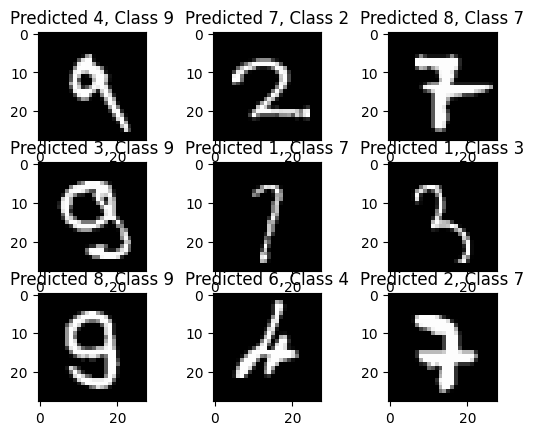

In [12]:
# Get the predicted class labels by taking argmax of predicted probabilities
predicted_labels = np.argmax(predicted_classes, axis=1)

# Find indices where predictions were incorrect
incorrect_indices = np.where(predicted_labels != y_test)[0]

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_labels[incorrect], y_test[incorrect]))
plt.show()

In [13]:
# plt.figure()
# for i, incorrect in enumerate(incorrect_indices[:9]):
#     plt.subplot(3,3,i+1)
#     plt.imshow(X_test [incorrect].reshape(28,28), cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Class {}".format (predicted_classes [incorrect],y_test[incorrect]))
# plt.show()

In [14]:
# Save Model
model.save("myAlexNetModel.keras")

## 1. Importing the libraries

In [15]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

In [16]:
import glob

# Load file names for both cats and dogs
files = glob.glob('dogs-vs-cats/train/*/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]

In [17]:
import glob

# Load file names for both cats and dogs
files = glob.glob('dogs-vs-cats/train/*/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]

print(f"Number of cat files: {len(cat_files)}")
print(f"Number of dog files: {len(dog_files)}")

Number of cat files: 25000
Number of dog files: 25000


In [ ]:
cat_files

In [ ]:
dog_files

In [20]:
# length of cat and dog files
len(cat_files),len(dog_files)

(25000, 25000)

# Training set

In [21]:
# choose a random set of 1500 images for training dataset
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)

# subtract the training set from the original dataset
cat_files = np.setdiff1d(cat_files, cat_train)
dog_files = np.setdiff1d(dog_files, dog_train)

In [22]:
# length of cat and dog train
len(cat_train),len(dog_train)

(1500, 1500)

In [23]:
len(cat_files),len(dog_files)

(23500, 23500)

# Validation Set

In [24]:
# validation dataset
cat_val = np.random.choice(cat_train, size=500, replace=False)
dog_val = np.random.choice(dog_train, size=500, replace=False)

# subtract the validation set from the training set
cat_files = np.setdiff1d(cat_files, cat_val)
dog_files = np.setdiff1d(dog_files, dog_val)

In [25]:
len(cat_val),len(dog_val)

(500, 500)

# Test Set

In [26]:
# Test set
cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

In [27]:
len(cat_test),len(dog_test)

(500, 500)

In [28]:
# print shape of cat and dogs of train, test and validation
print(f"Cat train: {cat_train.shape}, Cat val: {cat_val.shape}, Cat test: {cat_test.shape}")
print(f"Dog train: {dog_train.shape}, Dog val: {dog_val.shape}, Dog test: {dog_test.shape}")

Cat train: (1500,), Cat val: (500,), Cat test: (500,)
Dog train: (1500,), Dog val: (500,), Dog test: (500,)


In [29]:
# Rewrite the training, validation and test set to the respective folders
import os
train_dir = 'training_data'
validation_dir = 'validation_data'
test_dir = 'test_data'

# Concat images of cat and dog classes across the training, validation and test set
train_files = np.concatenate([cat_train, dog_train])
validation_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

# create seperate directories for each set
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(validation_dir) if not os.path.isdir(validation_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

# physically copy the files into the designated folders
for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validation_files:
    shutil.copy(fn, validation_dir)

for fn in test_files:
    shutil.copy(fn, test_dir)

In [30]:
# Data Preparation

import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [31]:
# load dataset

import glob
import matplotlib.pyplot as plt
IMG_DIM = (150, 150)

# training images path
train_files = glob.glob('training_data/*')

# load training images
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]

# convert imags to numpy array
train_imgs = np.array(train_imgs)

# create labels by splitting teraining file name
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

# validation images path
valid_files = glob.glob('validation_data/*')

# load validation images

validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]

# convert images to numpy array
validation_imgs = np.array(validation_imgs)

# create labels by splitting training file name
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

In [32]:
print('Train dataset shape:', train_imgs.shape, '\Validation dataset shape:', validation_imgs.shape)

Train dataset shape: (2916, 150, 150, 3) \Validation dataset shape: (1000, 150, 150, 3)


<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Sahil\AppData\Local\Temp\ipykernel_6968\1123745822.py:1: SyntaxWarning: invalid escape sequence '\V'
  print('Train dataset shape:', train_imgs.shape, '\Validation dataset shape:', validation_imgs.shape)


In [33]:
# Normalize training and validation images

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


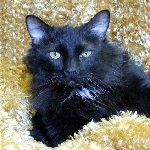

In [34]:
print(train_imgs[1].shape)
array_to_img(train_imgs[99])

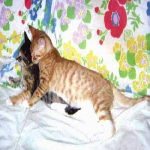

In [35]:
array_to_img(train_imgs[31])

In [36]:
# Encoding text category labels

from sklearn.preprocessing import LabelEncoder

# Extract actual labels from paths
train_labels = [label.split('\\')[-1] for label in train_labels]
validation_labels = [label.split('\\')[-1] for label in validation_labels]

le = LabelEncoder()
le.fit(train_labels)

train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1450:1463], train_labels_enc[1450:1463])

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 0 0 0 1 1 1 1 1]


In [37]:
# pre-trained CNN model as a feature extractor

from keras.applications import vgg16, ResNet50, InceptionV3, Xception, MobileNetV2, resnet
from keras.models import Model
import keras

input_shape = (150, 150, 3)

In [38]:
# loading pretrained vgg16 without top fully connected layers
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

# freeze all the layers
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

# add new layers on top of the pretrained model
output = keras.layers.Dense(1024, activation='relu')(output)
output = keras.layers.Dense(512, activation='relu')(output)

In [39]:
# check out the status of all vgg layes so far

import pandas as pd
pd.set_option('max_colwidth', 50)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_1, built=True>",input_layer_1,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


In [40]:
# Loading pretrained resnet without top fully connected layers
resnet = resnet.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)
resnet_model = Model(resnet.input, output)

# freeze all the layers
resnet_model.trainable = False  
for layer in resnet_model.layers:
    layer.trainable = False

In [41]:
# check out the status of all vgg layes so far

import pandas as pd
pd.set_option('max_colwidth', 50)
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_2, built=True>",input_layer_2,False
1,"<ZeroPadding2D name=conv1_pad, built=True>",conv1_pad,False
2,"<Conv2D name=conv1_conv, built=True>",conv1_conv,False
3,"<BatchNormalization name=conv1_bn, built=True>",conv1_bn,False
4,"<Activation name=conv1_relu, built=True>",conv1_relu,False
...,...,...,...
171,"<Conv2D name=conv5_block3_3_conv, built=True>",conv5_block3_3_conv,False
172,"<BatchNormalization name=conv5_block3_3_bn, bu...",conv5_block3_3_bn,False
173,"<Add name=conv5_block3_add, built=True>",conv5_block3_add,False
174,"<Activation name=conv5_block3_out, built=True>",conv5_block3_out,False


In [42]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras import optimizers

In [43]:
# stack fully connected layers on top of VGG16 model
# custom-made layers

from keras.layers import Dense
modelvgg = Sequential()
modelvgg.add(vgg_model)
modelvgg.add(Dense(512, activation='relu', input_dim=input_shape))
modelvgg.add(Dropout(0.3))
modelvgg.add(Dense(512, activation='relu'))
modelvgg.add(Dropout(0.3))
modelvgg.add(Dense(1, activation='sigmoid'))

modelvgg.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])
modelvgg.summary()

c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_26 (Functional)      │ (None, 8192)           │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,172,673 (73.14 MB)

 Trainable params: 4,457,985 (17.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [44]:
# traing the model
historyvgg = modelvgg.fit(x=train_imgs_scaled, y=train_labels_enc, validation_data=(validation_imgs_scaled, validation_labels_enc), batch_size=30, epochs=3, verbose=1)

Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 574s 6s/step - accuracy: 0.7038 - loss: 0.5480 - val_accuracy: 0.7840 - val_loss: 0.4241
Epoch 2/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 558s 5s/step - accuracy: 0.8704 - loss: 0.2954 - val_accuracy: 0.8710 - val_loss: 0.2828
Epoch 3/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 421s 4s/step - accuracy: 0.8834 - loss: 0.2782 - val_accuracy: 0.8610 - val_loss: 0.2920


In [45]:
# save model
modelvgg.save("./myVGGmodel.keras")

In [56]:
# load the vgg model
from tensorflow import keras
modelvgg = keras.models.load_model('./myVGGmodel.keras')

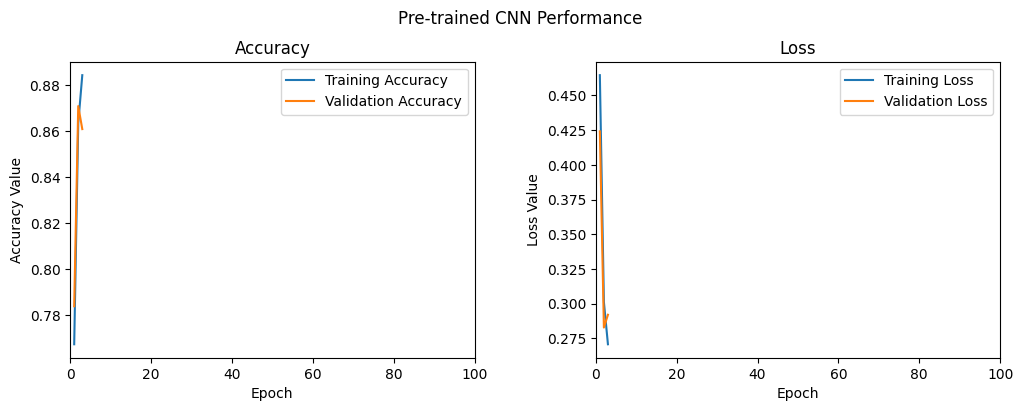

In [57]:
# checking the model accuracy and loss in graph

import numpy as np
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, len(historyvgg.history['accuracy']) + 1))
ax1.plot(epoch_list, historyvgg.history['accuracy'], label='Training Accuracy')

ax1.plot(epoch_list, historyvgg.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 20))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

ax2.plot(epoch_list, historyvgg.history['loss'], label='Training Loss')
ax2.plot(epoch_list, historyvgg.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 20))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')